## Empezamos con lo de siempre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

## Preprocesado para trabajar con FTSE - con los retornos 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

# ARMA NECESITA ESTACIONARIOS....

In [8]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


## ARMA(1,1)

In [9]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1)) #el primer retorno no esta ... al no haber periodo anterior
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

#la constante es no significativa ... al usar retornos es normal que vayan alrededor de 0
#ar es de signos positivo y MA negativo
#AR de 0.76 indica que hay una tendencia positiva entre valores pasados (1) y presentes
# ma es mas dificil deinterpretar - al ser dnegativo indica que nos deberiamos alejar de valores pasados 

# arma al ser la evolucion de ar y de ma podemos comparar modelos entre si



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 08 Apr 2023   AIC                          15841.000
Time:                        16:43:56   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [10]:
# ES MEJOR EL CONJUNTO QUE POR INDIVIDUAL, VAMOS A VERLO

model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ma_1=model_ret_ma_1.fit()


results_ret_ar_1.summary()
results_ret_ma_1.summary()

# lo comparamos para ver si es un mejor modelo
# y vemos que mejora a los dos por separado

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 08 Apr 2023   AIC                          15865.190
Time:                        16:43:57   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 08 Apr 2023   AIC                          15865.497
Time:                        16:43:57   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
print("\nARMA vs AR ", LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1))

# la diferencia es de un grado de libertad - el 1 ya es por defecto
# el modelo mas complejo la segunda!!! sino devolveria 1
# los modelos son estadisticamente mejores - EL USO DE VALORES PASADOS Y 
# ERRORES PASADOS PRODUCE MEJORES RESULTADOS SIN UNA COMPLEJIDAD EZXCESIVA AL JUNTAR DOS DE GRADO 1


ARMA vs AR  0.0

ARMA vs MA  0.0


## ARMA DE ALTO GRADO

En AR o MA se empezaba por nivel 1, el mas simple,y se añadia retrado hasta ver que ya no era significativo.
Fuimos complejizando el modelo hasta que ya no era relevante.
AL combinar ambas partes y tener mas potencia es lo gico pensare que hara falta menos dimensiones al poder capturar mas tendencias 

En el caso de ARMA SE HACE AL REVES, SE COGE UN MODELO SOBREPARAMETRIZADO (UN NUMERO ELEVADO DE PARAMETROS) y
se va reduciendo hasta que todos los parametros son relevantes

EL PROCESO PONE DE MANIFIESTO LA NECESIDAD DE AUTOMATIZACION 

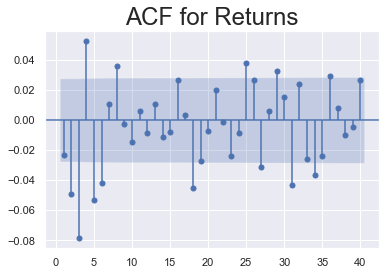

In [13]:
# para saber donde empezar empezamos con ACF y PACF
# ACF


sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns",size=24)
plt.show()

#MA seria hasta 8 como mucho ...

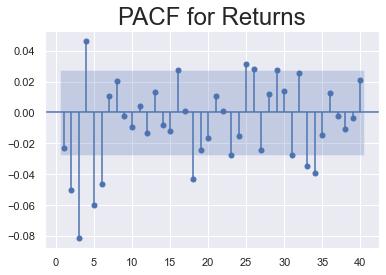

In [14]:
sgt.plot_pacf(df.returns[1:], zero = False, lags = 40, method='ols')
plt.title("PACF for Returns",size=24)
plt.show()

# PACF miramos el componen AR - a lo sumo seria 6

# lo suyo es epserar un modelo mucho mas sencillo que (6,8) al ser 6 y 8 los usados en AR MA por separado para explicarlo
# no haria falta tanto retraso

# vale con empezar con mas o menos la mita ARMA(3,3) y usamos LLR (ratio log verosimilitudes) para ver si se mejora el predictor

In [15]:
# ELEGIMOS UN 3,3 COMO BASELINE
# y desde aqui intentamos "descomplejizar"

model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

# laconstante no suele ser relevante
# L1 AR y MA no son relevantes .. el primero... lo cual indica que lo podriamos reducir...
# no es significativo L2 mejor no usar este modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 08 Apr 2023   AIC                          15803.030
Time:                        16:44:02   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [16]:
LLR_test(results_ret_ar_1_ma_1, results_ret_ar_3_ma_3, DF = 4)


# lo comparamos con el (1,1) y el (3,3) si mejor al (1,1) pero lo podemos reducir lo anterior

0.0

In [17]:
model_ar_1_ma_2 = ARMA(df.returns[1:], order=(1,2))
results_ar_1_ma_2 = model_ar_1_ma_2.fit()
model_ar_2_ma_1 = ARMA(df.returns[1:], order=(2,1))
results_ar_2_ma_1 = model_ar_2_ma_1.fit()

model_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ar_1_ma_3 = model_ar_1_ma_3.fit()
model_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ar_3_ma_1 = model_ar_3_ma_1.fit()
model_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ar_2_ma_2 = model_ar_2_ma_2.fit()


model_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ar_3_ma_2 = model_ar_3_ma_2.fit()
model_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ar_2_ma_3 = model_ar_3_ma_2.fit()

# NO AÑADIMOS OTRAS DE ORDEN 6 PORQUE QUEREMOS DESCOMPLEJIZAR

In [18]:
print("ARMA(3,3):  \t LL = ", results_ret_ar_3_ma_3.llf, "\t AIC = ", results_ret_ar_3_ma_3.aic)
print("ARMA(1,2):  \t LL = ", results_ar_1_ma_2.llf, "\t AIC = ", results_ar_1_ma_2.aic)
print("ARMA(1,3):  \t LL = ", results_ar_1_ma_3.llf, "\t AIC = ", results_ar_1_ma_3.aic)
print("ARMA(2,1):  \t LL = ", results_ar_2_ma_1.llf, "\t AIC = ", results_ar_2_ma_1.aic)
print("ARMA(2,2):  \t LL = ", results_ar_2_ma_2.llf, "\t AIC = ", results_ar_2_ma_2.aic)
print("ARMA(3,1):  \t LL = ", results_ar_3_ma_1.llf, "\t AIC = ", results_ar_3_ma_1.aic)
print("ARMA(3,2):  \t LL = ", results_ar_3_ma_2.llf, "\t AIC = ", results_ar_3_ma_2.aic)
print("ARMA(2,3):  \t LL = ", results_ar_2_ma_3.llf, "\t AIC = ", results_ar_2_ma_3.aic)

ARMA(3,3):  	 LL =  -7893.514759916752 	 AIC =  15803.029519833504
ARMA(1,2):  	 LL =  -7913.6702978749245 	 AIC =  15837.340595749849
ARMA(1,3):  	 LL =  -7896.837893752793 	 AIC =  15805.675787505586
ARMA(2,1):  	 LL =  -7913.456336200864 	 AIC =  15836.912672401728
ARMA(2,2):  	 LL =  -7913.222797825763 	 AIC =  15838.445595651527
ARMA(3,1):  	 LL =  -7899.072139793761 	 AIC =  15810.144279587523
ARMA(3,2):  	 LL =  -7895.747458514511 	 AIC =  15805.494917029022
ARMA(2,3):  	 LL =  -7895.747458514511 	 AIC =  15805.494917029022


In [31]:
# (3,3) SIGUE SIENDO EL MEJOR MODELO


## Residuos

Una vez seleccionado analizamos los residuos del modelo. redis extrae los residuos de los retornos del modelo ARMA 3,2 (quedara a partir de la segunda fila)

In [24]:

df['res_ret_ar_3_ma_3'] =  results_ret_ar_3_ma_3.resid[1:]

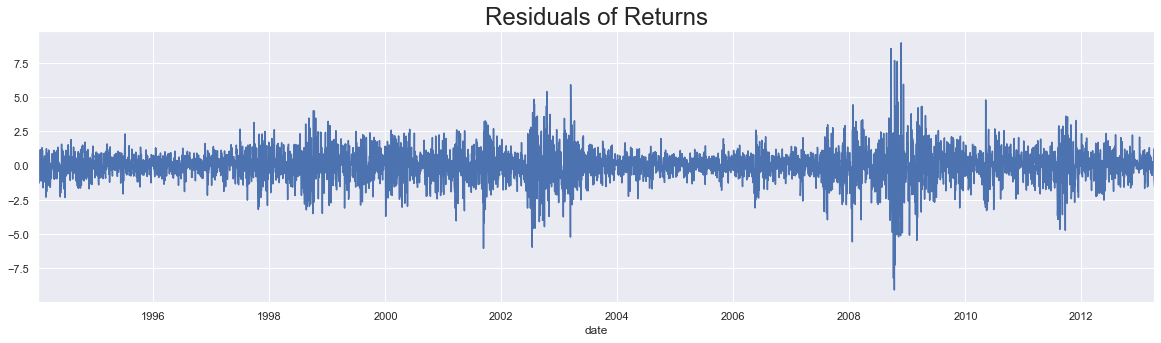

In [25]:
df.res_ret_ar_3_ma_3.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

# muy parecido a los redisuos de AR y MA

In [26]:
import statsmodels.tsa.stattools as sts 
sts.adfuller(results_ret_ar_3_ma_3.resid[1:])


(-12.674104855301243,
 1.2264441672221833e-23,
 32,
 4986,
 {'1%': -3.43166220814716,
  '5%': -2.862119853748156,
  '10%': -2.567078656914853},
 15691.666258737676)

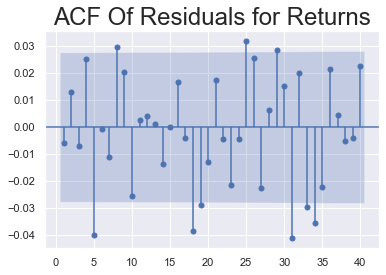

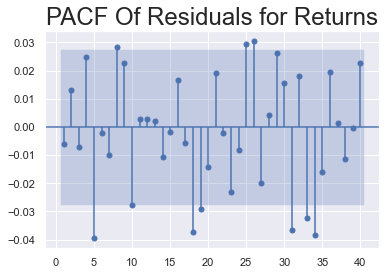

In [27]:
sgt.plot_acf(df.res_ret_ar_3_ma_3[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

# la autocorrelacion de los residuos - es sorprdendete ver que tenemos retrasos mas siginifcativos que con los modelos AR y
#MA por separado 
# esto quiere decir quel 5 es significativo y por tanto no es ruido - odriamos comprobar un ARMA (5,5) ya que parece que eso 
#tienacion
# y compararlo con los anteriores
# vamos a reevaluar modelos empezando por el 5,5

sgt.plot_pacf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("PACF Of Residuals for Returns",size=24)
plt.show()

## Reevaluando Model Selection

In [31]:
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

# muchos de los coefites no sonsignificativos- eso quiere decir que esos retrasos son redundantes

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Thu, 05 May 2022   AIC                          15788.321
Time:                        14:51:09   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_5_ma_4 = ARMA(df.returns[1:], order=(5,4))
results_ar_5_ma_4 = model_ar_5_ma_4.fit()
model_ar_5_ma_3 = ARMA(df.returns[1:], order=(5,3))
results_ar_5_ma_3 = model_ar_5_ma_3.fit()
model_ar_5_ma_2 = ARMA(df.returns[1:], order=(5,2))
results_ar_5_ma_2 = model_ar_5_ma_2.fit()
model_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ar_5_ma_1 = model_ar_5_ma_1.fit()
model_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ar_1_ma_5 = model_ar_1_ma_5.fit()

In [27]:
print("ARMA(5,4):  \t LL = ", results_ar_5_ma_4.llf, "\t AIC = ", results_ar_5_ma_4.aic)
print("ARMA(5,3):  \t LL = ", results_ar_5_ma_3.llf, "\t AIC = ", results_ar_5_ma_3.aic)
print("ARMA(5,2):  \t LL = ", results_ar_5_ma_2.llf, "\t AIC = ", results_ar_5_ma_2.aic)
print("ARMA(5,1):  \t LL = ", results_ar_5_ma_1.llf, "\t AIC = ", results_ar_5_ma_1.aic)
print("ARMA(1,5):  \t LL = ", results_ar_1_ma_5.llf, "\t AIC = ", results_ar_1_ma_5.aic)


ARMA(5,4):  	 LL =  -7883.86455961298 	 AIC =  15789.72911922596
ARMA(5,3):  	 LL =  -7885.42165024178 	 AIC =  15790.84330048356
ARMA(5,2):  	 LL =  -7885.666643480712 	 AIC =  15789.333286961424
ARMA(5,1):  	 LL =  -7889.311282945926 	 AIC =  15794.622565891852
ARMA(1,5):  	 LL =  -7890.973460209441 	 AIC =  15797.946920418883


In [32]:
# miramos los restantes, solo 5,1 y 1,5 producen coeificentes que son todos significativos... el resto ninguno
# vamos seleccionando estos por sus AIC y encontramos el que tenga todos losvalores significativos

model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Thu, 05 May 2022   AIC                          15794.623
Time:                        14:51:16   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8614j            1.6261           -0.0888
AR.3            1.3793           +0.8614j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

## Residuos del nuevo modelo 5,1

In [36]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

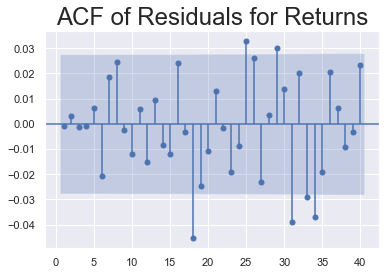

In [38]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

# en este caso el quinto retraso ya no es significativo ..... el primero es el 18
#se podria hacer algun retraso mas pero eso genera overfitting al complejizar demasiado elmodelo cuando se use en prediccion

# como los primeros 10 retrasos no son relevantes ya se puede decir que los primeros 10 residuos son bastante aleatorios

## ARMA con datos no estacionarios (precios, market value)
Lo hemos visto con retorno que suelen ser datos estacionarios
MA y AR fallan al predecir datos no estacionarios
vamos a ver ARMA

Si comparamos ambos tambien vemos que ARMA no funciona bien para no estacionario. Modela mejor los datos que son estaciuonarios que los no estacionarios (retornos vs. precios)

Falta como adaptar los modelos ARMA a series no estacionarias.

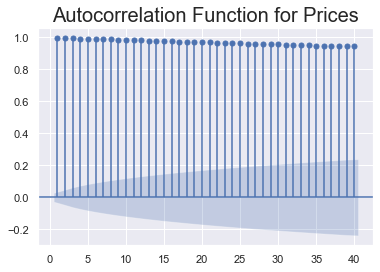

In [39]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices",size=20)
plt.show()

# todos loscoeficientes son significativos
# asi como 6 de PACF
# esto sigiere infitinos retrasos a MA o lo que es lo mismo un AR(1) - asi podemos usar un numero de retrasos finitos

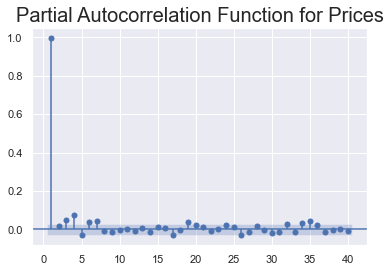

In [40]:


sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [41]:

model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

# ma no es significativo - un modelo simple no es el adecuado ... vemos los residuos para ver como elegir el modelo complejo

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.785
Method:                       css-mle   S.D. of innovations             59.248
Date:                Thu, 05 May 2022   AIC                          55251.569
Time:                        14:53:32   BIC                          55277.655
Sample:                    01-07-1994   HQIC                         55260.710
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5056.0228    495.720     10.199      0.000    4084.430    6027.616
ar.L1.market_value     0.9985      0.001   1325.482      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5188           +0.0000j           52.5188            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

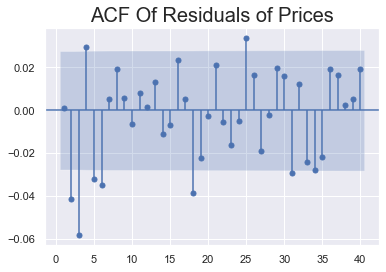

In [43]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals of Prices",size=20)
plt.show()

#autocorrelacion de los residuos 
# 5 de los primeros 6 son significativos .. no es ruido blanco ... estudiaremos hasta 6 retrasos de sos 5 son significativos

In [45]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
#results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()



# error al no ser estacionario - de las tres opciones podemos probar pasar lo propios parametros
# start ar  lags - empieza con un numero de retrasos en la parte AR (se prueba a partir del 6)
# algunos coeficientes son no significativo# habria que reducir el numero de retrasos - seria mantener 6 AR o 6 AM y reducir el resto ...

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.